# Module 8 Capstone Project: Exploring Employee Attrition

This project analyzes simulated data from IBM’s HR department in an attempt to understand the causes of employee attrition.  
The original data set can be found here: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset.

## Introduction

While employee attrition is a natural occurrance in any business, it has associated costs and consequences.  Understanding the broader trends associated with the hows and whys of attrition at a given company can save resources and increase efficiency.  Some of the most commonly cited causes of attrition include: company culture, overwork, undervalue, favoritism, and (perceived) lack of opportunity for advancement. This project analyzes simulated data from IBM’s HR department and begins by asking which if any of the data are predictive of attrition.   

## Question 1: Which data are useful for predicting employee attrition at IBM?

Of the thirty or so parameters included in this data set, two stood out immediately for their diagnostic value: 
    *Environment Satisfaction* and *Job Satisfaction*.  
    Both of these data were reported categorically as follows: **1:** *Low*  **2:** *Medium*  **3:** *High*  **4:** *Very High*. 

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind
%matplotlib inline

In [57]:
#assign data frames
df = pd.read_csv('Data/IMB_HR.csv')
df_quitters = df.loc[lambda df: df['Attrition'] == 'Yes', :]
df_stayers = df.loc[lambda df: df['Attrition'] == 'No', :]

EnvironmentSatisfaction reults:  Ttest_indResult(statistic=2.4586152284434997, pvalue=0.014378483257428331)


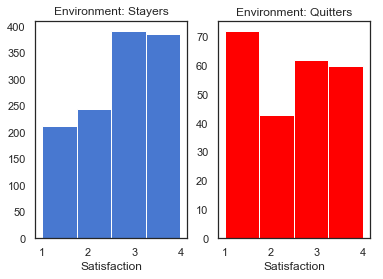

In [8]:
#Plot histograms of EnvironmentSatisfaction for quitters and stayers
sns.set(style="white", palette="muted", color_codes=True)

plt.subplot(1, 2, 1)
plt.hist(df_stayers['EnvironmentSatisfaction'], bins=4)
plt.title('Environment: Stayers')
plt.xlabel('Satisfaction')

plt.subplot(1, 2, 2)
plt.hist(df_quitters['EnvironmentSatisfaction'], bins=4, color='red')
plt.title('Environment: Quitters')
plt.xlabel('Satisfaction')
plt.show

#Take a random sample of both quitters and stayers for the T-test
pop1 = np.random.choice(df_quitters['EnvironmentSatisfaction'], 200, replace=True)
pop2 = np.random.choice(df_stayers['EnvironmentSatisfaction'], 200, replace=True)

print('EnvironmentSatisfaction reults: ', ttest_ind(pop2, pop1, equal_var=False))

Histograms of *Environment Satisfaction* data show a stark contrast between employees 
    who left the company and employees who stayed.
    The p-values of a comparative t-test between the two groups corroborate 
    the impression given by the histograms that these two parameters are indeed diagnostic.

JobSatisfaction reults:  Ttest_indResult(statistic=2.9936455996999776, pvalue=0.0029300792983439567)


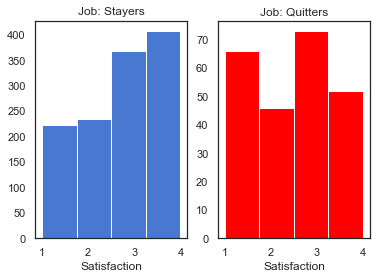

In [9]:
#Plot histograms of JobSatisfaction for quitters and stayers
sns.set(style="white", palette="muted", color_codes=True)
plt.subplot(1, 2, 1)
plt.hist(df_stayers['JobSatisfaction'], bins=4)
plt.title('Job: Stayers')
plt.xlabel('Satisfaction')

plt.subplot(1, 2, 2)
plt.hist(df_quitters['JobSatisfaction'], bins=4, color='red')
plt.title('Job: Quitters')
plt.xlabel('Satisfaction')
plt.show
#Stayers appear to be more likely to report high levels of JobSatisfaction as well.

#Take a random sample of both quitters and stayers for the T-test
pop10 = np.random.choice(df_quitters['JobSatisfaction'], 200, replace=True)
pop20 = np.random.choice(df_stayers['JobSatisfaction'], 200, replace=True)

print('JobSatisfaction reults: ', ttest_ind(pop20, pop10, equal_var=False))

A comparison of *Job Satisfaction* data shows results similar to *Environment Satisfaction*.  A t-test once again was used for corrobration. 

While the diagnostic power of these data is useful, it would be even more helpful to understand what factors are influencing the rates of satisfaction among employees.


## Q2: what factors could be influencing the satisfaction rates of employees?

Many of the parameters which were suspect such as compensation rates and raise percentages 
    were not found to have statistical significance in this data set.  
    However, commute distance was statistically significant between the two groups.  In particular, those leaving the company are more likely to have longer commutes, as shown in the following boxplots:
   

Commute comparison reults:  Ttest_indResult(statistic=-0.4922912950361996, pvalue=0.6227851066274641)


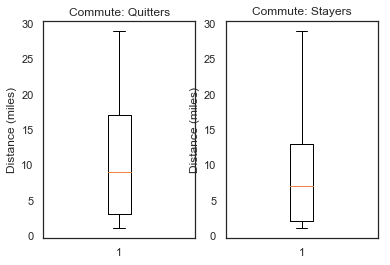

In [45]:
#Plot boxplots of commute distance for quitters and stayers
plt.subplot(1,2,1)
plt.boxplot(df_quitters['DistanceFromHome'])
plt.title('Commute: Quitters')
plt.ylabel('Distance (miles)')
plt.show

plt.subplot(1,2,2)
plt.boxplot(df_stayers['DistanceFromHome'])
plt.title('Commute: Stayers')
plt.ylabel('Distance (miles)')
plt.show

#Take a random sample of both quitters and stayers for the T-test
pop14 = np.random.choice(df_quitters['DistanceFromHome'], 200, replace=True)
pop24 = np.random.choice(df_stayers['DistanceFromHome'], 200, replace=True)

print('Commute comparison reults: ', ttest_ind(pop24, pop14, equal_var=False))

It seems intuitive that a long commute could have a deleterious effect on satisfaction rates, 
    but it seems unlikely to be solely responsible. 

## Q3: Could employees lives outside of work influence their satisfaction rates?
    
One dramatic difference between the two groups was Marital Status.
    As the diagrams indicate, a much larger percentage of those leaving their job are single,
    and those who are staying comprise a higher percentage of married individuals. 

<function matplotlib.pyplot.show(*args, **kw)>

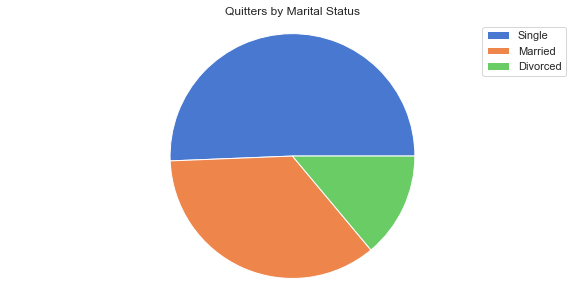

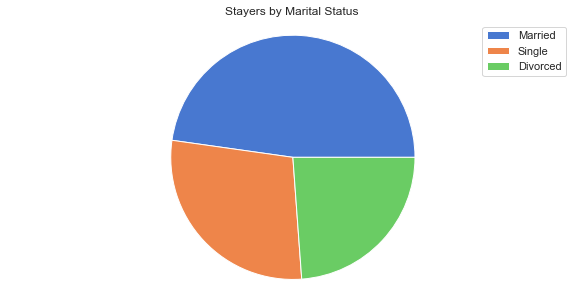

In [11]:
#count relationship categories for the pie charts 
status_counts_quitters = pd.DataFrame(df_quitters['MaritalStatus'].value_counts())
status_counts_stayers = pd.DataFrame(df_stayers['MaritalStatus'].value_counts())

#plot pie charts of marital status
plt.figure(figsize=(10, 5))
plt.pie(status_counts_quitters.MaritalStatus)
plt.axis('equal')
plt.title('Quitters by Marital Status')
plt.legend(status_counts_quitters.index)
plt.show

plt.figure(figsize=(10, 5))
plt.pie(status_counts_stayers.MaritalStatus)
plt.axis('equal')
plt.title('Stayers by Marital Status')
plt.legend(status_counts_stayers.index)
plt.show

Another interesting difference was age. An impressive proportion of the employees leaving the company 
    are aged between 28 and 35, as indicated by the following diagram:

A comparative t-test shows that the difference here is statistically significant.



Mean age for Stayers:  37.561232765612324
Mean age for Leavers:  33.607594936708864
Age comparison reults:  Ttest_indResult(statistic=3.988414554658962, pvalue=7.920707764355325e-05)


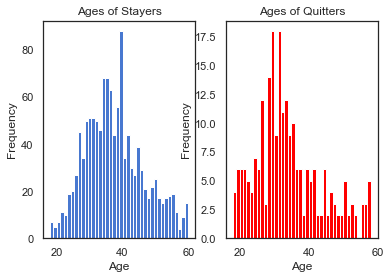

In [64]:
#assign arays to calculate the mean ages of both quitters and stayers
a = 'Age'

x = np.array([])
y = np.array([])

x = df_stayers[a]
y = df_quitters[a]

print('Mean age for Stayers: ', np.mean(x))
print('Mean age for Leavers: ', np.mean(y))

#plot histograms of the ages for both groups
plt.subplot(1,2,1)
plt.hist(df_stayers[a], bins=40)
plt.title('Ages of Stayers')
plt.ylabel('Frequency')
plt.xlabel(a)
plt.show

plt.subplot(1,2,2)
plt.hist(df_quitters[a], bins=40, color='red')
plt.title('Ages of Quitters')
plt.ylabel('Frequency')
plt.xlabel(a)
plt.show

#Take a random sample of both quitters and stayers for the T-test
pop11 = np.random.choice(df_quitters[a], 200, replace=True)
pop22 = np.random.choice(df_stayers[a], 200, replace=True)

print(a, 'comparison reults: ', ttest_ind(pop22, pop11, equal_var=False))

Although the mean ages of both groups are only about 4 years apart, the group leaving the company shows a spike around the age of 30, and a much higher percentage of people younger than 30.  This could be a reflection of broader social trends as opposed to any specific internal factors.      

## Conclusion: 
Understanding trends associated with employee attrition can help companies to save money and resources in the ling run.  The above analysis shows that such an understanding requires a deliberate, nuanaced approach.  While employees can leave their company for many different reasons, 
    these data suggest that on average, 
    less satisfied employees tend to be younger, specifically between the ages of 28-35, 
    single (the stability of marriage may be responsible for motivating persons to stay in their jobs), 
    and with longer commutes.  Further inquiry could explore other interesting parameters 
    such as opportunity for advancement and perception of leadership.